In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

In [2]:
df = pd.read_csv('Exam_Industry.csv',index_col=0,parse_dates=True)
mk = pd.read_csv('Exam_Market.csv',index_col=0,parse_dates=True)

## Calculate the vector of mean returns, standard deviation and the covariance matrix of returns for the ten industry portfolios

In [3]:
returns=df.mean()

In [4]:
returns

Cnsmr    1.343854
Manuf    0.997604
HiTec    1.475000
Hlth     1.237500
Other    1.263646
dtype: float64

In [5]:
# Calculate expected mean return
R = returns.values

In [6]:
R = R.reshape((5, 1))

In [7]:
R_table = pd.DataFrame(data = returns, columns = ['Mean'])
R_table

,Mean
Cnsmr,1.343854
Manuf,0.997604
HiTec,1.475000
Hlth,1.237500
Other,1.263646


In [8]:
# Calculate the Covariance matrix
cov=df.cov()

In [9]:
cov

,Cnsmr,Manuf,HiTec,Hlth,Other
Cnsmr,12.512708,13.162224,13.724477,10.487382,16.877001
Manuf,13.162224,20.016587,16.525904,11.884592,21.463796
HiTec,13.724477,16.525904,19.748996,12.304805,20.867189
Hlth,10.487382,11.884592,12.304805,15.974912,14.893000
Other,16.877001,21.463796,20.867189,14.893000,31.336146


In [10]:
cov2 = df.cov().values

In [11]:
cov2

array([[12.51270815, 13.16222407, 13.72447737, 10.48738237, 16.87700054],
       [13.16222407, 20.01658683, 16.52590368, 11.88459184, 21.4637962 ],
       [13.72447737, 16.52590368, 19.74899579, 12.30480526, 20.86718895],
       [10.48738237, 11.88459184, 12.30480526, 15.97491158, 14.89299974],
       [16.87700054, 21.4637962 , 20.86718895, 14.89299974, 31.33614552]])

## Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios.

In [12]:
### Creat Standard deviation 
SD=df.std()

In [13]:
table=pd.concat([returns,SD],axis=1)
table

,0,1
Cnsmr,1.343854,3.537331
Manuf,0.997604,4.473990
HiTec,1.475000,4.443984
Hlth,1.237500,3.996863
Other,1.263646,5.597870


In [14]:
SD = SD.values
SD

array([3.53733065, 4.47399003, 4.44398422, 3.99686272, 5.59786973])

In [15]:
table.columns = ['mean returns', 'standard deviation']
table

,mean returns,standard deviation
Cnsmr,1.343854,3.537331
Manuf,0.997604,4.473990
HiTec,1.475000,4.443984
Hlth,1.237500,3.996863
Other,1.263646,5.597870


#### Calculate the unit vector, alpha, zeta and gamma

In [16]:
e=np.ones((5,1))

#### Calculate the inverse of cov matrix

In [17]:
inverseV = np.linalg.inv(cov2)

In [18]:
inverseV.shape

(5, 5)

In [19]:
alpha = reduce(np.dot, [R.T,inverseV, e])[0][0]

In [20]:
alpha

0.1287144176968645

In [21]:
zeta=reduce(np.dot, [R.T,inverseV, R])[0][0]

In [22]:
zeta

0.1997843716134948

In [23]:
delta=reduce(np.dot, [e.T,inverseV, e])[0][0]

In [24]:
delta

0.10124068348950796

### Function: varaince of R on frontier

In [25]:
total_stock=len(df.columns) #n=5

In [26]:
min_std=[]

In [27]:
limit_var=np.linspace(0.0,2.5,251)

In [28]:
for R0 in limit_var:
    variance_of_return= (delta*(R0**2)-(2*R0*alpha)+zeta)/(zeta*delta-alpha*alpha)
    min_std.append(np.sqrt(variance_of_return))

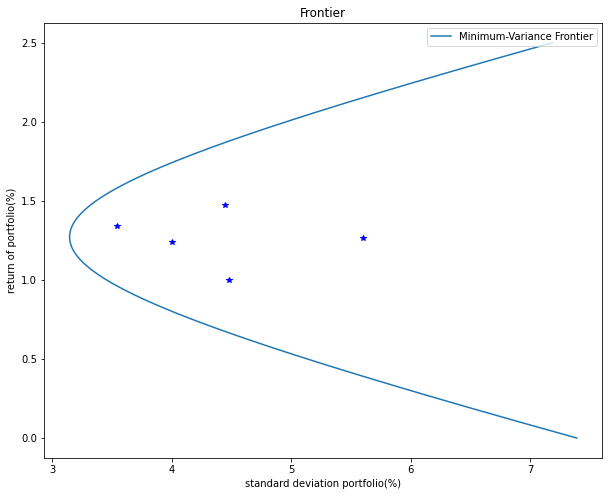

In [29]:
plt.figure(figsize=(10,8))
plt.plot(SD,R,'b*');
plt.plot(min_std,limit_var,label='Minimum-Variance Frontier')
plt.xlabel('standard deviation portfolio(%)')
plt.ylabel('return of portfolio(%)')  
plt.title('Frontier')
plt.legend(loc = 'upper right')
plt.show()

### Global minimum variance portfolio

In [30]:
min_vol_ind = np.argmin(min_std)
min_vol_portf_rtn = limit_var[min_vol_ind]
min_vol_portf_vol = min_std[min_vol_ind]

In [31]:
R_MV=alpha/delta
R_MV

1.2713704931694163

## set risk-free rate is 0.13%

In [32]:
rf= 0.0013

In [33]:
limit_var2=np.linspace(0.0,2.5,251)

In [34]:
min_std2=[]

In [35]:
delta

0.10124068348950796

In [36]:
for R0 in limit_var2:
    variance_of_return= ((R0-rf)**2)/(zeta-2*alpha*rf+delta*(rf**2))
    min_std2.append(np.sqrt(variance_of_return))

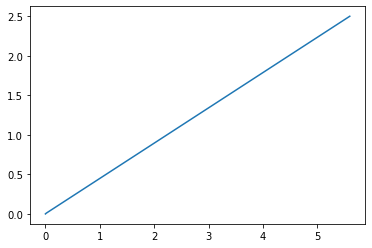

In [37]:
plt.plot(min_std2,limit_var2,label='Efficient Frontier')

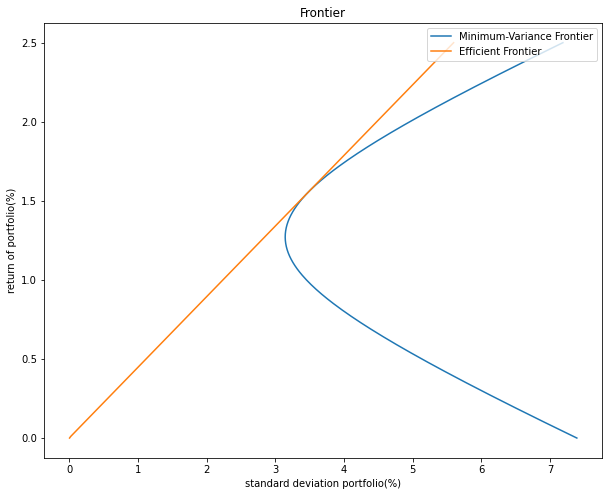

In [38]:
plt.figure(figsize=(10,8))
plt.plot(min_std,limit_var,label='Minimum-Variance Frontier')
plt.plot(min_std2,limit_var2,label='Efficient Frontier')
plt.xlabel('standard deviation portfolio(%)')
plt.ylabel('return of portfolio(%)')
plt.title('Frontier')
plt.legend(loc = 'upper right')
plt.show()

## %plot tangency portfolio

In [39]:
### Calculate Return of Tangency Portfolio
rtg=(alpha*rf-zeta)/(delta*rf-alpha)

In [40]:
rtg

1.5524396373842353

In [41]:
print(alpha)
print(zeta)
print(delta)

0.1287144176968645
0.1997843716134948
0.10124068348950796


In [42]:
sigmatg=(-(zeta-2*alpha*rf+delta*rf**2)**0.5)/(delta*(rf-alpha/delta))

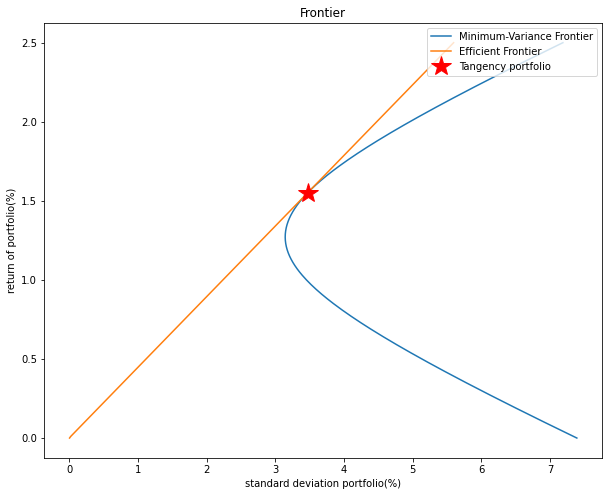

In [43]:
plt.figure(figsize=(10,8))
plt.plot(min_std,limit_var,label='Minimum-Variance Frontier')
plt.plot(min_std2,limit_var2,label='Efficient Frontier')
plt.plot(sigmatg,rtg,'r*',label='Tangency portfolio',markersize=20)
plt.xlabel('standard deviation portfolio(%)')
plt.ylabel('return of portfolio(%)')  
plt.title('Frontier')
plt.legend(loc = 'upper right')
plt.show()

## sharpe ratio of Tangency portfoliosharpe ratio 

In [44]:
### sharpe ratio 
sharpe_ratio = (rtg-rf)/sigmatg

In [45]:
sharpe_ratio

0.4465981249672215

## Calculate Weight of Tangency Portfolio

In [46]:
### Calculate a & b 
a = (np.dot(zeta * inverseV, e) - np.dot(alpha * inverseV, R)) / (zeta *delta - alpha**2)
a


array([[ 0.28193668],
       [ 3.00489581],
       [-2.22278105],
       [ 0.65165183],
       [-0.71570327]])

In [47]:
b = (np.dot(delta * inverseV, R) - np.dot(alpha * inverseV, e)) / (zeta * delta - alpha**2)
b

array([[ 0.6568212 ],
       [-2.2010107 ],
       [ 1.67344603],
       [-0.30854324],
       [ 0.17928671]])

In [48]:
W = a + b * rtg
W

array([[ 1.30161194],
       [-0.41204044],
       [ 0.3751429 ],
       [ 0.17265707],
       [-0.43737148]])

In [49]:
Name = ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other']
Name

['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other']

In [50]:
Weight_table = pd.DataFrame(data = W,columns = ['Weight'])
Weight_table

,Weight
0,1.301612
1,-0.412040
2,0.375143
3,0.172657
4,-0.437371


In [51]:
Name = ['Cnsmr', 'Manuf', 'HiTec', 'Hlth ', 'Other']
Name_table = pd.DataFrame(data = Name,columns = ['Company'])
Name_table
table2=pd.concat([Name_table,Weight_table],axis=1)
table2

,Company,Weight
0,Cnsmr,1.301612
1,Manuf,-0.412040
2,HiTec,0.375143
3,Hlth,0.172657
4,Other,-0.437371


In [52]:
table2=pd.concat([Name_table,Weight_table],axis=1)
table2

,Company,Weight
0,Cnsmr,1.301612
1,Manuf,-0.412040
2,HiTec,0.375143
3,Hlth,0.172657
4,Other,-0.437371
